# 나랑 닮은 연예인을 찾아보자!

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#문제정의" data-toc-modified-id="문제정의-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>문제정의</a></span></li><li><span><a href="#데이터-준비" data-toc-modified-id="데이터-준비-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 준비</a></span></li></ul></div>

In [1]:
import numpy as np

## 문제정의

우리나라 셀럽들의 얼굴 사진을 모아서 나의 얼굴 사진과 비교해보자.

## 데이터 준비

셀럽 사진을 모아놓은 파일을 다운로드했다.

[(313, 526, 634, 205)]


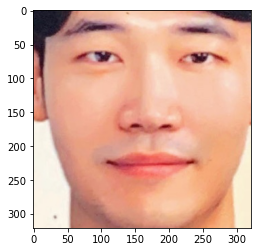

In [2]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/민기.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

공유 형님의 얼굴을 출력해봤다. 잘나온다. 잘생겼다. 가지고싶다.

얼굴을 가져오는 함수를 만들어 놓자

In [3]:
import face_recognition
import os

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

폴더에 있는 파일들을 리스트로 가져와보자

In [4]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print(len(file_list))
print ("file_list: {}".format(file_list))

305
file_list: ['유재석.jpg', '톰 홀랜드.jpg', '레오나르도 디카프리오.jpeg', '조승우.jpeg', '조달환.png', '권현빈.jpg', '정국.jpg', '한효주.jpg', '숀 코네리.jpg', '박서준.jpg', '김광현.jpg', '서현진.jpg', '아이즈원김채원.jpg', '온앤오프라운.jpg', '장원준.jpeg', '수호.jpg', '정형돈.jpg', '여자아이들수진.jpeg', '안재홍.jpg', '이정재.jpg', '이민호.jpeg', '정준하.jpg', '신태용.jpg', '김영삼.jpeg', '이용진.jpg', '한기범.jpg', '제니.jpg', '지드래곤.jpeg', '피어스 브로스넌.jpg', '김남주.jpeg', '공유.jpg', '카이.jpg', '손예진.jpeg', '박진영.jpeg', '윤종신.jpeg', '박명수.jpg', '방시혁.jpeg', '도지한.jpg', '이재용.jpg', '옥냥이.jpeg', '로제.jpg', '조이.jpg', '켄 정.jpeg', '조정석1.jpg', '장동건.jpeg', '제이홉.jpg', '서강준.jpg', '이대호.jpeg', '이동휘.jpg', '김희철.jpg', '강하늘.jpg', '이천수.jpg', '비니.jpg', '씨잼.jpg', '하현우.jpg', '신동엽.jpg', '지수.jpg', '온앤오프효진.jpg', 'trump.jpg', '이진욱.jpg', '황정민.jpg', '티파니.jpg', '차범근.jpeg', '이연걸.jpeg', '김대중.jpg', '문재인.jpeg', '뷔.png', '김유정.jpg', '딕헌터.jpeg', '조원희.jpg', '수지.jpg', '이근대위.jpeg', '슈가.jpg', '마크 러팔로.jpeg', '제이콥 배털론.jpg', '우기.jpg', '슈퍼비.jpeg', '꽈두룹.jpeg', '오정태.jpg', '잇섭.png', '김우빈.png', '이승기.jpeg', 'b1a4진영.jpeg', '미미.jpg', '김경진.

총 302명의 사진을 모았다.

In [5]:
image_file = os.path.join(dir_path, '민기.jpg')
face = get_gropped_face(image_file)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding, len(embedding[0])

([array([-0.10924628,  0.11856651,  0.06617455, -0.05775369, -0.16668057,
         -0.08013923, -0.09819541, -0.12727064,  0.09272775, -0.07439797,
          0.2125448 , -0.0515595 , -0.15566906, -0.12723626, -0.0187383 ,
          0.18389811, -0.1849582 , -0.13282746, -0.02274682,  0.00056292,
          0.06885186,  0.00809064,  0.08052202,  0.02751385, -0.12275798,
         -0.35634181, -0.08837319, -0.07650718,  0.0200554 , -0.03800538,
         -0.08867332,  0.06936388, -0.1734603 , -0.10118883,  0.04341294,
          0.11437345, -0.04068092, -0.05660969,  0.12680803, -0.06133719,
         -0.24284057,  0.05512914,  0.04770752,  0.25662953,  0.2337551 ,
          0.01983342,  0.05303936, -0.10622887,  0.13834733, -0.14243317,
          0.05242902,  0.14114742,  0.103953  ,  0.03093817,  0.03201331,
         -0.08546004,  0.06083732,  0.12583359, -0.10598453,  0.00516053,
          0.11726337, -0.05651022,  0.02520152, -0.08521517,  0.21575078,
          0.03559722, -0.09385535, -0.

In [6]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    err_cnt = 0
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        try:
            face = get_gropped_face(img_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        except:
            err_cnt += 1
            print(file)
    print(err_cnt)
#     return embedding_dict

In [7]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['공유']

산들.jpeg
1


TypeError: 'NoneType' object is not subscriptable

In [ ]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('공유', '민기')

나와 공유형의 거리는 딱 이만큼...

In [ ]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('공유')   

In [ ]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

In [ ]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    return sorted_faces

In [ ]:
# 가장 닮은 사람 출력하기
get_nearest_face('조정석')